# <center><font color='navy'>ACC Active Falls Data</font>

## <center><font color='navy'>by Sanjay Patel</font>

## <u><font color='navy'>Agenda</font></u>

#### 1. Introduction
- What is the ACC?
- Why did I choose this dataset?



#### 2. Fetching and Cleaning the Dataset
- Getting the data
- Cleaning the data


## <u><font color='navy'>Agenda</font></u>

#### 3. Exploratory Data Analysis
- Overview of the numerical data
- Breakdown of claims by ethnicity
- Where are most people falling?
- Which age is at the highest risk of falling?
- Breakdown of costs

# <center><u><font color='navy'>1. Introduction</font></u>

## <u><font color='navy'>What is the ACC?</font></u>

ACC (Accident Compensation Corporation) is New Zealand’s accident compensation scheme. It provides no-fault personal injury insurance cover to all New Zealand residents and visitors to New Zealand.  

ACC claims relating to accidents caused by an action categorised as falling. Falling in this context includes:
 - slipping or skidding on foot
 - tripping or stumbling
 - loss of consciousness or sleep
 - misjudgement of support
 - loss of balance or personal control

## <u><font color='navy'>Why did I choose this dataset?</font></u>

To see the costs breakdown of different demographics over the past 10 years.

# <center><u><font color='navy'>2. Fetching and Cleaning the Dataset</font></u>

## <u><font color='navy'>Import the Libraries - Glenn's Top Tip (One of Many)</font></u>

In [3]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <u><font color='navy'>Request Dataset from API</font></u>

In [ ]:
response = requests.get('https://catalogue.data.govt.nz/api/3/action/datastore_search?resource_id=8ac43157-06d0-4778-a8a0-93fb8843527f&limit=32000')
dic = response.json()
dic = dic['result']['records']
df = pd.DataFrame(dic)
offset = 32000

for i in range(9):
    response = requests.get(f'https://catalogue.data.govt.nz/api/3/action/datastore_search?resource_id=8ac43157-06d0-4778-a8a0-93fb8843527f&limit=32000&offset={offset}')
    dic = response.json()
    dic = dic['result']['records']
    df_temp = pd.DataFrame(dic)
    df = pd.concat([df, df_temp])
    offset += 32000

In [32]:
df

,_id,Accident Location,Territorial Authority,Accident Scene,Client Gender,Client Ethnicity,Age Group,Payment Financial Year,Active Claims,Active Costs
0,1,Auckland,Auckland City,Commercial / Service Location,Female,Asian,00 to 19 Years of age,2012/13,87,"$15,180"
1,2,Auckland,Auckland City,Commercial / Service Location,Female,Asian,00 to 19 Years of age,2013/14,98,"$20,980"
2,3,Auckland,Auckland City,Commercial / Service Location,Female,Asian,00 to 19 Years of age,2014/15,118,"$34,200"
3,4,Auckland,Auckland City,Commercial / Service Location,Female,Asian,00 to 19 Years of age,2015/16,124,"$34,648"
4,5,Auckland,Auckland City,Commercial / Service Location,Female,Asian,00 to 19 Years of age,2016/17,101,"$22,760"
...,...,...,...,...,...,...,...,...,...,...
2155,290156,West Coast,Westland District,School,Male,Maori,40 to 49 Years of age,2013/14,<4,$698
2156,290157,West Coast,Westland District,School,Male,Other Ethnicity,00 to 19 Years of age,2019/20,<4,<$100
2157,290158,West Coast,Westland District,School,Male,Other Ethnicity,00 to 19 Years of age,2021/22,<4,$259
2158,290159,West Coast,Westland District,School,Male,Pacific Peoples,00 to 19 Years of age,2019/20,<4,$124


## <u><font color='navy'>Cleaning the dataset</font></u>

In [ ]:
# change the index column

df.set_index(['_id'], inplace=True)

In [41]:
# rename columns to remove spaces

df.rename(columns={ 'Accident Location': 'accident_location',
                    'Territorial Authority': 'territorial_authority',
                     'Accident Scene': 'accident_scene',
                     'Client Gender': 'client_gender',
                     'Client Ethnicity': 'client_ethnicity',
                     'Age Group': 'age_group',
                     'Payment Financial Year': 'payment_financial_year',
                     'Active Claims': 'active_claims',
                     'Active Costs': 'active_costs'}, inplace=True)

## <u><font color='navy'>Cleaning the dataset</font></u>

In [47]:
# clean up age_group column

df['age_group'].replace('00 to 19 Years of age', '0 to 19', inplace=True)
df['age_group'].replace('20 to 29 Years of age', '20 to 29', inplace=True)
df['age_group'].replace('30 to 39 Years of age', '30 to 39', inplace=True)
df['age_group'].replace('40 to 49 Years of age', '40 to 49', inplace=True)
df['age_group'].replace('50 to 59 Years of age', '50 to 59', inplace=True)
df['age_group'].replace('60 to 69 Years of age', '60 to 69', inplace=True)
df['age_group'].replace('70 to 79 Years of age', '70 to 79', inplace=True)
df['age_group'].replace('80 Years and older', '80 and older', inplace=True)

0 to 19         46092
40 to 49        41269
20 to 29        40646
30 to 39        40479
50 to 59        40243
60 to 69        34860
70 to 79        26653
80 and older    19918
Name: age_group, dtype: int64

## <u><font color='navy'>Cleaning the dataset</font></u>

In [50]:
# clean up payment_financial_year column

# rename values
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2012/13', '2012')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2013/14', '2013')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2014/15', '2014')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2015/16', '2015')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2016/17', '2016')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2017/18', '2017')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2018/19', '2018')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2019/20', '2019')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2020/21', '2020')
df['payment_financial_year'] = df['payment_financial_year'].str.replace('2021/22', '2021')

# convert column to int
df['payment_financial_year'] = df['payment_financial_year'].astype(int)

2020    30993
2021    30720
2019    29829
2018    29801
2017    28706
2015    28530
2014    28337
2016    28279
2013    27804
2012    27161
Name: payment_financial_year, dtype: int64

## <u><font color='navy'>Cleaning the dataset</font></u>

In [63]:
# clean up active_claims column

# calculate mean for claims that are less than 4
less_than_4 = df[df['active_claims'] == ' <4']
mean = int((1 + 2 + 3) / 3)

# rename values that are less than 4 to the mean value i.e 2
df['active_claims'] = df['active_claims'].str.replace(' <4', '2')

# remove commas from numbers
df['active_claims'] = df['active_claims'].str.replace(',', '')

# convert column to int
df['active_claims'] = df['active_claims'].astype(int)

## <u><font color='navy'>Cleaning the dataset</font></u>

In [563]:
# clean up actve_costs column

# remove commas and dollar sign 
df['active_costs'] = df['active_costs'].str.replace(',', '')
df['active_costs'] = df['active_costs'].str.replace('$', '')

# calculate mean for costs that are less than 100
num = 0
for i in range(100):
    num += i
    
mean = num / 99

# apply mean value to costs that are less than 100
df['active_costs'] = df['active_costs'].str.replace(' <100', '50.0')

# convert column to float
df['active_costs'] = df['active_costs'].astype(float)

## <u><font color='navy'>Check for any null values in columns</font></u>

In [377]:
df.isna().value_counts()

accident_location  territorial_authority  accident_scene  client_gender  client_ethnicity  age_group  payment_financial_year  active_claims  active_costs
False              False                  False           False          False             False      False                   False          False           290160
dtype: int64

## <u><font color='navy'>Double check data types</font></u>

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290160 entries, 1 to 290160
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   accident_location       290160 non-null  object 
 1   territorial_authority   290160 non-null  object 
 2   accident_scene          290160 non-null  object 
 3   client_gender           290160 non-null  object 
 4   client_ethnicity        290160 non-null  object 
 5   age_group               290160 non-null  object 
 6   payment_financial_year  290160 non-null  int32  
 7   active_claims           290160 non-null  int32  
 8   active_costs            290160 non-null  float64
dtypes: float64(1), int32(2), object(6)
memory usage: 19.9+ MB


In [93]:
df

,accident_location,territorial_authority,accident_scene,client_gender,client_ethnicity,age_group,payment_financial_year,active_claims,active_costs
_id,,,,,,,,,
1,Auckland,Auckland City,Commercial / Service Location,Female,Asian,0 to 19,2012,87,15180.0
2,Auckland,Auckland City,Commercial / Service Location,Female,Asian,0 to 19,2013,98,20980.0
3,Auckland,Auckland City,Commercial / Service Location,Female,Asian,0 to 19,2014,118,34200.0
4,Auckland,Auckland City,Commercial / Service Location,Female,Asian,0 to 19,2015,124,34648.0
5,Auckland,Auckland City,Commercial / Service Location,Female,Asian,0 to 19,2016,101,22760.0
...,...,...,...,...,...,...,...,...,...
290156,West Coast,Westland District,School,Male,Maori,40 to 49,2013,2,698.0
290157,West Coast,Westland District,School,Male,Other Ethnicity,0 to 19,2019,2,50.0
290158,West Coast,Westland District,School,Male,Other Ethnicity,0 to 19,2021,2,259.0


# <center><u><font color='navy'>3. Exploratory Data Analysis</font></u>

## <u><font color='navy'>Overview of the numerical columns</font></u>

In [502]:
cost.describe().style.format("{:.2f}")

,active_claims,active_costs
count,10.00,10.00
mean,870898.80,1134073490.55
std,56104.04,300391285.02
min,743522.00,709034533.74
25%,858815.75,937953696.56
50%,879227.00,1077384352.26
75%,909541.75,1325568835.88
max,940995.00,1600303671.15


## <u><font color='navy'>Breakdown of ACC Claims by Ethnicity</font></u>

In [547]:
ethnic = df.groupby(df['client_ethnicity']).sum()
ethnic = ethnic.drop(columns=['payment_financial_year'])
ethnic.sort_values(by='active_costs', ascending=False).style.format("{:.2f}")

,active_claims,active_costs
client_ethnicity,,
European,6097091.00,8158543001.35
Maori,953529.00,1425840539.08
Asian,648382.00,598079278.07
Pacific Peoples,455818.00,486949854.25
Other Ethnicity,368401.00,428815845.69
Residual Categories,185767.00,242506387.04


## <u><font color='navy'>Breakdown of ACC Claims by Ethnicity</font></u>

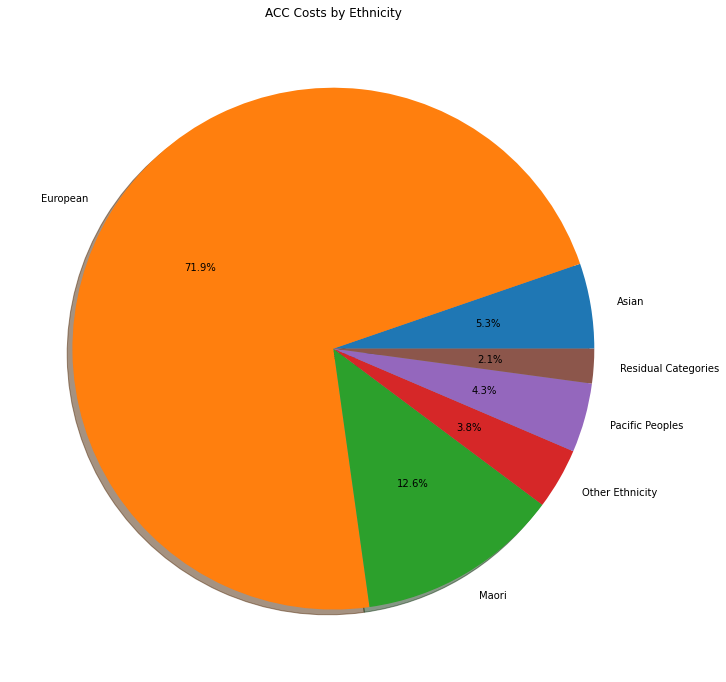

In [548]:
# Ethnic breakdown using pie chart

fig = plt.figure(figsize=(12, 12))
labels = ['Asian', 'European', 'Maori', 'Other Ethnicity', 'Pacific Peoples', 'Residual Categories']    
plt.pie(ethnic['active_costs'], autopct='%1.1f%%', shadow=True, labels=labels)
plt.title('ACC Costs by Ethnicity')
plt.show()

## <u><font color='navy'>Where are most people falling over?</font></u>

In [559]:
scene = df.groupby(df['accident_scene']).sum()
scene = scene.drop(columns=['payment_financial_year'])
scene.sort_values(by='active_claims', ascending=False).style.format("{:.2f}")

,active_claims,active_costs
accident_scene,,
Home,4227684.00,4863434774.90
Place of Recreation or Sports,1971706.00,2187087562.97
Other,727762.00,1286961723.65
Road or Street,586935.00,1017435122.05
School,488366.00,181896486.39
Commercial / Service Location,412614.00,938723166.07
Industrial Place,128890.00,428393159.54
Farm,107576.00,258256479.21
Place of Medical Treatment,43816.00,122220160.03


## <u><font color='navy'>Where are most people falling over?</font></u>

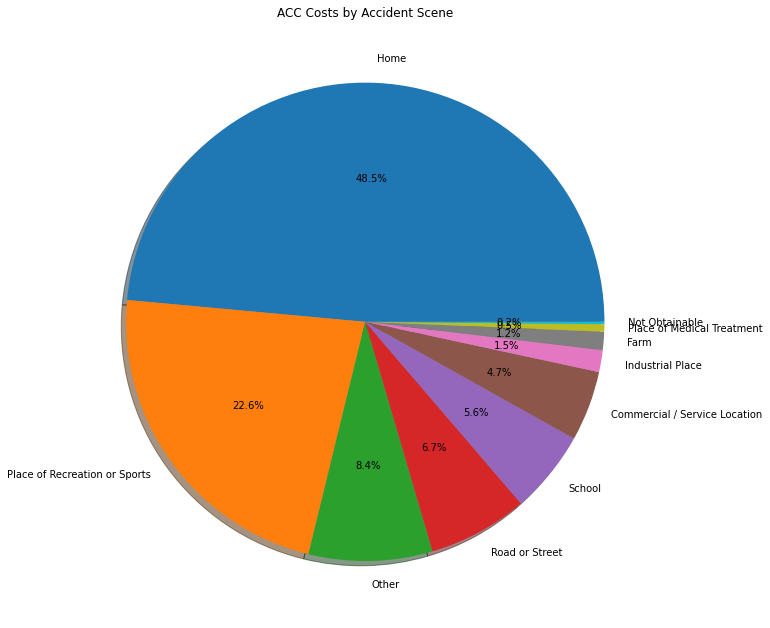

In [564]:
# accident scene breakdown using pie chart

scene = scene.sort_values(by='active_claims', ascending=False)
fig = plt.figure(figsize=(11, 11))
labels = ['Home', 'Place of Recreation or Sports', 'Other', 'Road or Street', 'School',
          'Commercial / Service Location', 'Industrial Place', 'Farm', 'Place of Medical Treatment', 'Not Obtainable']
plt.pie(scene['active_claims'], autopct='%1.1f%%', shadow=True, labels=labels)
plt.title('ACC Costs by Accident Scene')
plt.show()

## <u><font color='navy'>Which age is at high risk of falling and where?</font></u>

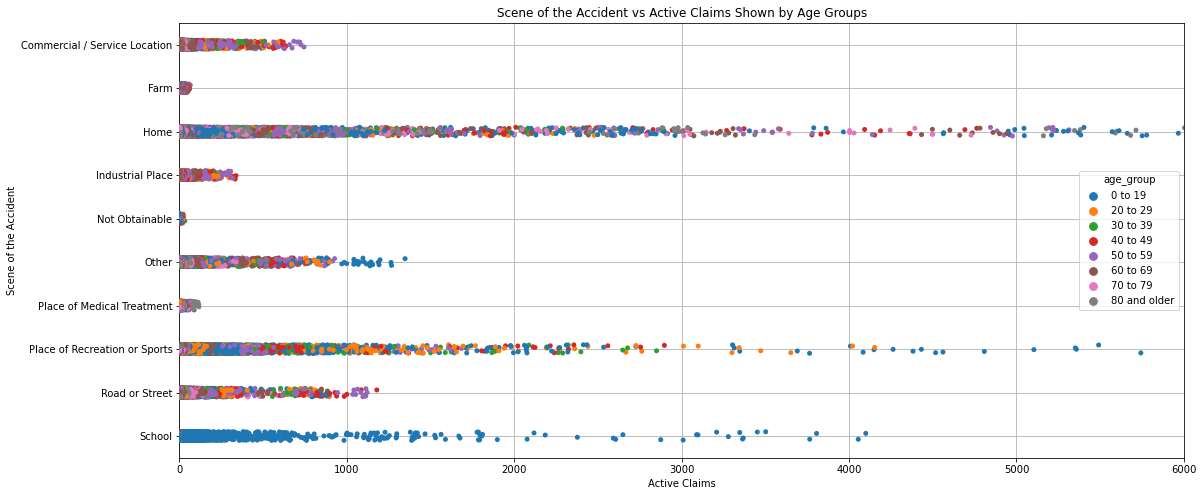

In [551]:
# strip plot between scene of the accident and active claims shown by age group

fig = plt.figure(figsize=(18,8))
sns.stripplot(data=df, y="accident_scene", x="active_claims", hue="age_group")
plt.xlim(0, 6000)
plt.title('Scene of the Accident vs Active Claims Shown by Age Groups')
plt.ylabel('Scene of the Accident')
plt.xlabel('Active Claims')
plt.grid()
plt.show()

## <u><font color='navy'>Overview of the Costs</font></u>

Average:  39084.418615522474
Median:   1930.0


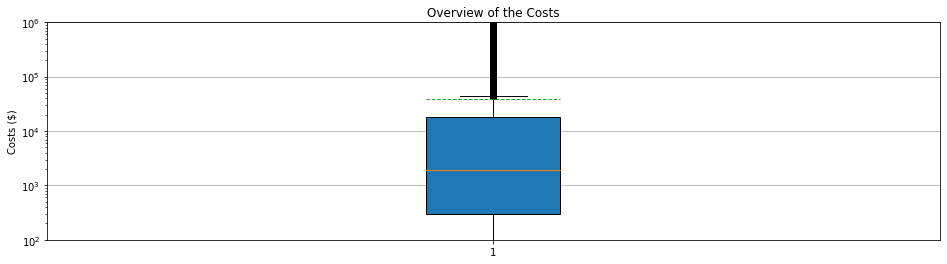

In [566]:
# boxplot of active_costs column

avg = np.mean(df['active_costs'])
median = np.median(df['active_costs'])
print('Average: ', avg)
print('Median:  ', median)

fig = plt.figure(figsize=(16, 4))
plt.boxplot(df['active_costs'], patch_artist=True, showmeans=True, meanline=True)
plt.ylim(100, 1000000)
plt.yscale('log')
plt.title('Overview of the Costs')
plt.ylabel('Costs ($)')
plt.grid()
plt.show()

## <u><font color='navy'>Are the costs and claims going up by the year?</font></u>

In [552]:
# group by payment financial year and get sum of costs and claims

cost = df.groupby(df['payment_financial_year']).sum()
cost.sort_values(by='active_costs', ascending=False).style.format("{:.2f}")

,active_claims,active_costs
payment_financial_year,,
2021,859244.00,1600303671.15
2020,940995.00,1545185401.23
2019,858673.00,1347915468.55
2018,914498.00,1258528937.88
2017,882085.00,1122566287.98
2016,876369.00,1032202416.55
2015,915725.00,1005814411.81
2014,894673.00,915333458.15
2013,823204.00,803850318.44


## <u><font color='navy'>Costs between males and females - is there a difference?</font></u>

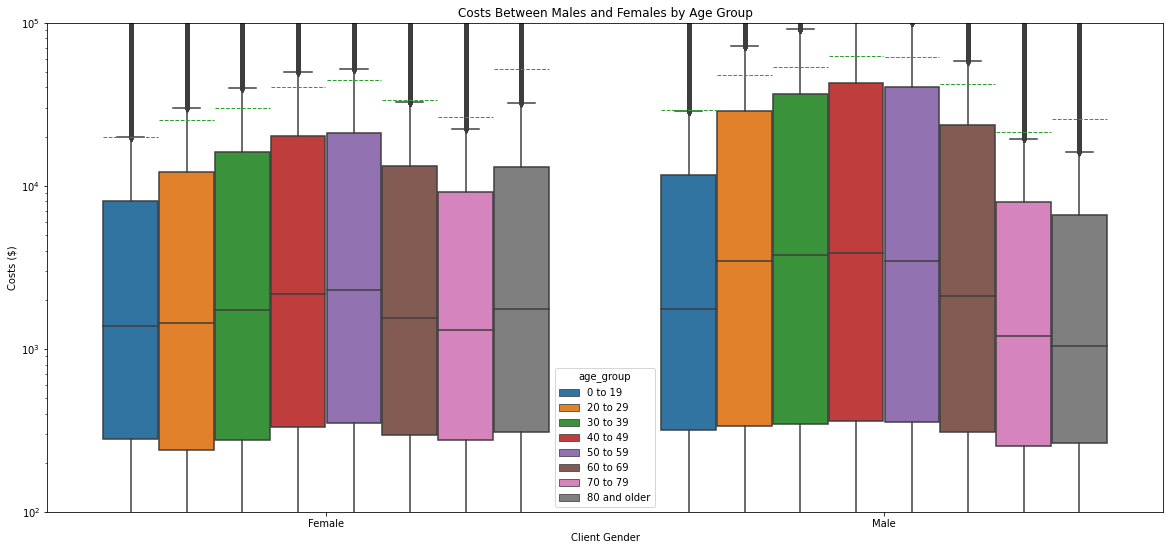

In [555]:
# Costs between males and females by age groups

fig = plt.figure(figsize=(20, 9))
sns.boxplot(x=df['client_gender'], y=df['active_costs'], hue=df['age_group'], showmeans=True, meanline=True)
plt.title('Costs Between Males and Females by Age Group')
plt.ylabel('Costs ($)')
plt.xlabel('Client Gender')
plt.ylim(100, 100000)
plt.yscale('log')
plt.show()

## <u><font color='navy'>Which age group has the highest cost?</font></u>

In [553]:
age = df.groupby(df['age_group']).sum()
age = age.drop(columns=['payment_financial_year'])
age.sort_values(by='active_costs', ascending=False).style.format("{:.2f}")

,active_claims,active_costs
age_group,,
50 to 59,1148028.00,2138098109.91
40 to 49,1095836.00,2118938527.89
30 to 39,930917.00,1706709044.18
20 to 29,1023883.00,1511854361.53
60 to 69,929649.00,1313390876.36
0 to 19,2305964.00,1134798503.46
80 and older,594151.00,779019961.69
70 to 79,680560.00,637925520.46


## <u><font color='navy'>How do the number of costs and claims correlate?</font></u>

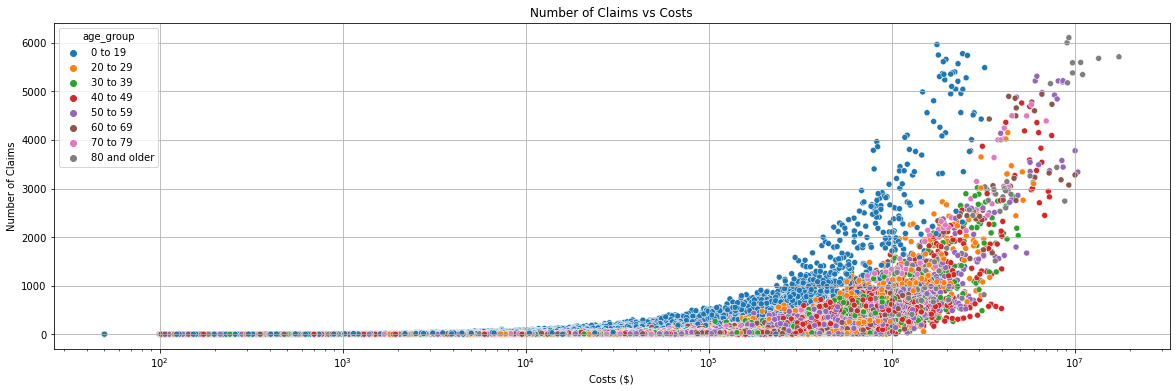

In [330]:
# Checking correlation of claims and costs using scatter plot

fig = plt.figure(figsize=(20,6))
sns.scatterplot(data=df, x='active_costs', y='active_claims', hue='age_group')
plt.xscale('log')
plt.title('Number of Claims vs Costs')
plt.xlabel('Costs ($)')
plt.ylabel('Number of Claims')
plt.grid()
plt.show()

## <u><font color='navy'>Summary</font></u>

- Europeans contribute the most to the number of claims

- Majority of the falls occur at home

- In the extreme, younger and older people have the highest number of claims

- Costs are going up yearly regardless of the number of claims

## <u><font color='navy'>Resources</font></u>

- https://catalogue.data.govt.nz/dataset/fall-data
- https://seaborn.pydata.org/index.html
- https://pandas.pydata.org/docs/index.html
- https://www.acc.co.nz/newsroom/media-resources/injuries-from-falls/

# <center><u><font color='navy'>Questions</font></u>